### Makine Öğrenmesi

#### Muhammed Furkan Baltacı- 218102022

### İhtiyacımız olacak olan kütüphaneler 

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sn
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
#from sklearn.preprocessing import Imputer

#np.set_printoptions(threshold=sys.maxsize)
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
# Sürümden kaynaklı hatalı göz ardı etmek için kullanıyoruz.
warnings.filterwarnings('ignore')
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
# Keras specific
import keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
#from keras.utils import to_categorical 

## Verilerin Okunması Ve Hazırlanması

In [105]:
df=pd.read_csv('emotions.csv')
    
sample=df['label']

label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

#y = df["Number of Credit Problems"].values.reshape(-1,1)  #sütun haline getirdik
#x = df.drop([""],axis=1)


In [93]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    print("Toplam çıkış",y.shape)
    print("Toplam giriş",X.shape)
    #Not : train_test_split fonksiyonu verileri random olarak böler. Aynı bölünmeyi tekrar elde edebilmek için rastgele belirlediğimiz random_state parametresi kullanılır.
    #train_test_split () sklearn'de kullanıcıların verilerini eğitim ve test setlerine bölmelerine olanak tanıyan bir yöntemdir.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [94]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

print("Eğitim için giriş verilerinin boyutu",X_train.shape)
print("Test için giriş verilerinin boyutu",X_test.shape)
print("Eğitim için çıkış verilerinin boyutu",y_train.shape)
print("Test için çıkış verilerinin boyutu",y_test.shape)


Toplam çıkış (2132,)
Toplam giriş (2132, 2548)
Eğitim için giriş verilerinin boyutu (1492, 2548)
Test için giriş verilerinin boyutu (640, 2548)
Eğitim için çıkış verilerinin boyutu (1492,)
Test için çıkış verilerinin boyutu (640,)


## Yapay Sinir Ağı Modeli ile Sınıflandırma

In [95]:
# Dense - Düğümlerimiz, activation- aktivasyon fonksiyonlarımız 
# Aktivasyon fonksiyonları çok katmanlı yapay sinir ağlarında doğrusal olmayan (non-linear) dönüşüm işlemleri için kullanılmaktadır.
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2548))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Y_train = np.asarray(Y_train).astype('float32')
# Compile the model
from tensorflow import keras
import tensorflow as tf

#categorical_crossentropy          sparse_categorical_crossentropy
#[1,0,0]                             1
#[0,1,0]                             2
#[0,0,1]                             3
# optimizer öğrenme hızını belirleyen algoritma 'adam' learnig-rate = 0.001 den 0.0001 e değişerek gider
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                163136    
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 99        
Total params: 166,371
Trainable params: 166,371
Non-trainable params: 0
_________________________________________________________________


In [96]:
# validationı arttırdığımızda yani eğitim için data sayısını arttırdığımızda acc oranı artar
# batch_size, bir seferde yapay sinir ağını eğitmek için kullanılacak örnek sayısını belirtir.
# epoch, bütün veri kümesinin yapay sinir ağından bir kere geçmesi ise bir devir olarak adlandırılır.
history = model.fit(X_train, y_train,validation_split=0.3, batch_size=32,  epochs=10) 

Epoch 1/10
33/33 [==============================] - 3s 79ms/step - loss: 16911020589056.0000 - accuracy: 0.5852 - val_loss: 6358480977920.0000 - val_accuracy: 0.5112
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 15412393672704.0000 - accuracy: 0.6111 - val_loss: 20317745446912.0000 - val_accuracy: 0.6853
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 5758644649984.0000 - accuracy: 0.5680 - val_loss: 53448393359360.0000 - val_accuracy: 0.5335
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: 15725979762688.0000 - accuracy: 0.5613 - val_loss: 47468494454784.0000 - val_accuracy: 0.6384
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 4678709936128.0000 - accuracy: 0.6140 - val_loss: 1593817694208.0000 - val_accuracy: 0.4062
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 1098831298560.0000 - accuracy: 0.6188 - val_loss: 565973811200.0000 - val_accuracy: 0.6853
Epoch 7/10

20/20 [==============================] - 0s 2ms/step - loss: 66931369443328.0000 - accuracy: 0.6516
Test loss: 66931369443328.0
Test accuracy: 0.651562511920929
Test Accuracy: 65.16%


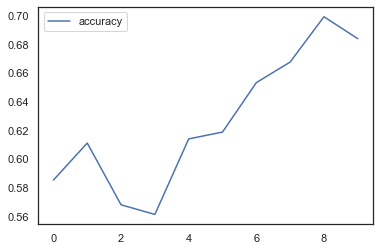

In [97]:
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

# accurancy ve loss değerlerinin 2.türlü bulunuşu
score=model.evaluate(X_test, y_test)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

pred=model.predict(X_test)


##  Naif Bayes

#### Naif(Naïve) Bayes sınıflandırması olasılık ilkelerine göre tanımlanmış bir dizi hesaplama ile, sisteme sunulan verilerin sınıfını yani kategorisini tespit etmeyi amaçlar.

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,mean_absolute_error,accuracy_score

gauss = GaussianNB().fit(X_train,y_train)
pred_gauss_train = gauss.predict(X_train)
pred_gauss_test = gauss.predict(X_test)

# Train accuracy
gauss_train_accr = round(gauss.score(X_train,y_train) * 100, 2)
gauss_test_accr = round(gauss.score(X_test,y_test) * 100, 2)

# Error rate
gauss_train_mae = round((mean_absolute_error(y_train, pred_gauss_train) * 100), 2)
gauss_test_mae = round((mean_absolute_error(y_test, pred_gauss_test) * 100), 2)

In [99]:
print("Gauss-Eğitim dogruluk oranı : %{}".format(gauss_train_accr))
print("Gauss-Test dogruluk oranı : %{}".format(gauss_test_accr))


Gauss-Eğitim dogruluk oranı : %39.95
Gauss-Test dogruluk oranı : %43.75


CONFUSION MATRİX


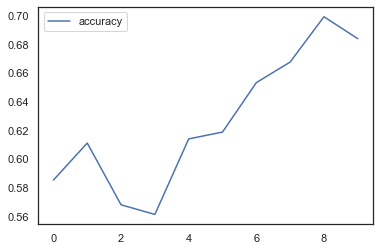

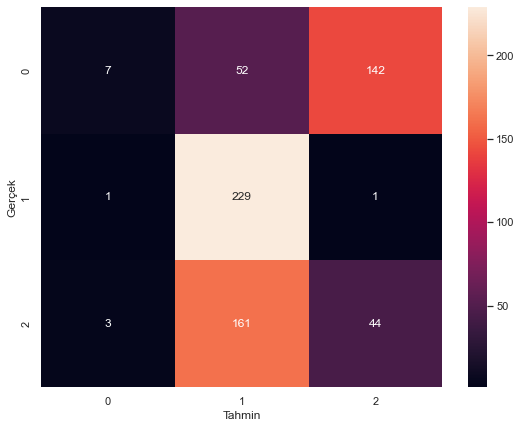

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

print("CONFUSION MATRİX")

sns.set(style='white')
conf_mat = confusion_matrix(y_test, pred_gauss_test)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()




## K-En Yakın Komşular

#### K-En yakın komşu algoritmaları, kullanılabilen tüm veri noktalarını depolayıp bir uzaklık işleviyle ölçüldüğü gibi her yeni veri noktasını buna en yakın olan veri noktalarını temel alarak sınıflandırır.

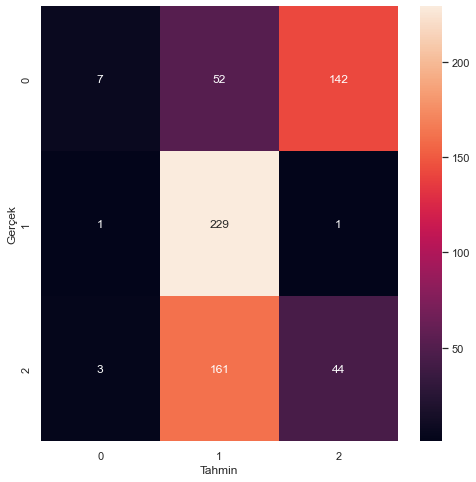

Knn-Eğitim dogruluk oranı : %79.22
Knn-Test dogruluk oranı : %72.19


In [101]:
from sklearn.model_selection import GridSearchCV
trainAcc = []
testAcc = []
##X_train, X_test, y_train, y_test = preprocess_inputs(df)
#param kısmında komşular için 20 farklı model deneyerek cross-validated score en yüksek olanı döndürüyor.
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1,8)}, cv=10)
knn = knn.fit(X_train, y_train)
pred_knn_train = knn.predict(X_train)
pred_knn_test = knn.predict(X_test)
    
knn_train_accr = round(knn.score(X_train,y_train) * 100, 2)
knn_test_accr = round(knn.score(X_test,y_test) * 100, 2)
    
trainAcc.append(knn_train_accr)
testAcc.append(knn_test_accr)   
    
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()
    
    
print("Knn-Eğitim dogruluk oranı : %{}".format(knn_train_accr))
print("Knn-Test dogruluk oranı : %{}".format(knn_test_accr))



## Random Forest Sınıflandırma

 #### Random forest, birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek daha isabetli sınıflandırma yapmaya çalışan bir sınıflandırma modelidir.

In [102]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Accuracy score for random_state = 123 : 0.9765625
[[196   0   5]
 [  0 229   2]
 [  7   1 200]]


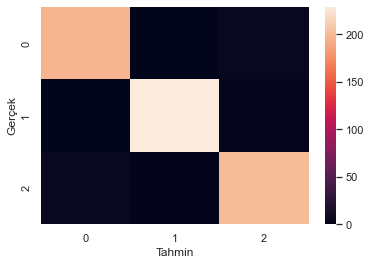

In [103]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score for random_state = 123 : ' + str(accuracy_score(y_test, y_pred)))

conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

import seaborn
seaborn.heatmap(conf_mat)
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

## Destek Vektörü Makineleri(Support Vector Machine) Sınıflandırma 

#### Birbirine en yakın olan veri noktaları arasında bir hiper düzlem çizer. Bu, sınıfları ayırır ve bunların daha net şekilde ayırt edilmesi için aralarındaki mesafeyi en yükseğe çıkarır. Sınıflandırmayı sınırdaki elemanlara göre yapar.

In [79]:
# input olarak vereceğimiz dataların aralıklarını(0-90 ile 0-250.000 olmamalı) bir birine daha yakın tutmak için feature scaling yapılmalı.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [83]:
 # Svc sınıfından modelimizi oluşturup, giriş ve çıkış verilerimizle eğitiyoruz.
from sklearn.svm import SVC
#her zaman aynı değere ulaşabilmek için random_state verilmektedir.
#SVM'nin verileri doğrusal sınıflandırma yapamdığı durumlarda bu kernel yapısını kullanıyoruz.(Ekstra boyut ekleyerek rahat çizgi çizmesini sağlıyor.)
classifier = SVC(kernel='rbf', random_state = 1) #‘linear’, ‘poly’, ‘(default)rbf’, ‘sigmoid’, ‘precomputed’ 
classifier.fit(X_train, y_train)

SVC(random_state=1)

In [84]:
y_pred = classifier.predict(X_test)

[[419  13]
 [ 24 184]]


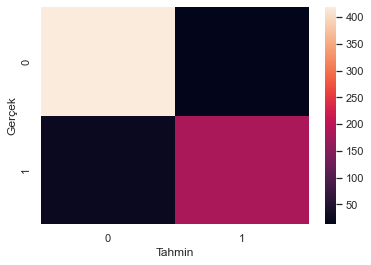

0.9421875


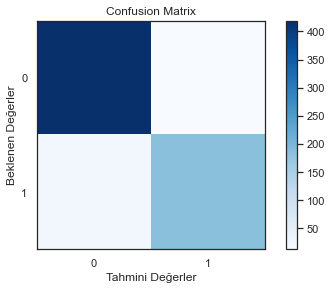

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
seaborn.heatmap(cm)
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(cm)

#Not = değerler 0,1,2 gibi output değerleri yerine 0,1 output değeri ile eğitildiğinde doğruluk oranında artış olmaktadır.

## Lojistik Regrasyon 

#### Sadece ikili sonuclarda sınıflandırma yapar. Evet/Hayır   --- Erkek/ Kadın ---  Zayıf/Şişman vb.

#### Sınıflandırılacak veri çıktımız 3 olduğu için dataların çıktılarını 2 olacak şekilde ayarlayıp işleme sokalım.

In [74]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 0, 'POSITIVE': 1}

def preprocessfor_binary(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    print("Toplam çıkış",y.shape)
    print("Toplam giriş",X.shape)
    #Not : train_test_split fonksiyonu verileri random olarak böler. Aynı bölünmeyi tekrar elde edebilmek için rastgele belirlediğimiz random_state parametresi kullanılır.
    #train_test_split () sklearn'de kullanıcıların verilerini eğitim ve test setlerine bölmelerine olanak tanıyan bir yöntemdir.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = preprocess_inputs(df)



Toplam çıkış (2132,)
Toplam giriş (2132, 2548)


In [75]:
# LogisticRegression sınıfını import ettik
from sklearn.linear_model import LogisticRegression

# LogisticRegression sınıfından bir nesne ürettik
lr = LogisticRegression(random_state=123,class_weight = 'balanced')

# Makinemizi eğittik
lr.fit(X_train,y_train)

# Test veri kümemizi verdik ve cinsiyet tahmin etmesini sağladık
result = lr.predict(X_test)

result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[[ 14 418]
 [ 16 192]]


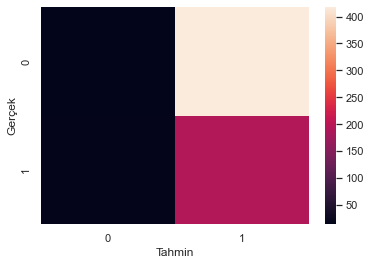

In [76]:
from sklearn.metrics import confusion_matrix
# Parametre olarak karşılaştıracağımız verileri giriyoruz.
# y_test : Cinsiyet Test Verisi
# result : x_test verisinden tahmin ettiğimiz cinsiyet verileri
cm = confusion_matrix(y_test,result)
print(cm)

import seaborn
seaborn.heatmap(cm)
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

In [104]:
#confusion 
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, [0,1])
    plt.yticks(tick_marks, [0,1])
    plt.tight_layout()
    plt.ylabel('Beklenen Değerler')
    plt.xlabel('Tahmini Değerler')